In [84]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [86]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f7c607f31937b87875b56e7bafdcf80c


In [87]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)  # this function helps in zipping the longitude and latitude with same index number togther
lat_lngs 

In [88]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [89]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [90]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | phrai bung
City not found. Skipping...
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | uttarkashi
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | sibi
Processing Record 10 of Set 1 | aksarka
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | bambanglipuro
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | maridi
City not found. Skipping...
Processing Record 21 of Set 1 | clyde river
Processing Record 22 of Set 1 | san ignacio
Process

Processing Record 30 of Set 4 | upernavik
Processing Record 31 of Set 4 | torres
Processing Record 32 of Set 4 | naze
Processing Record 33 of Set 4 | victoria
Processing Record 34 of Set 4 | dire dawa
Processing Record 35 of Set 4 | khandyga
Processing Record 36 of Set 4 | angoche
Processing Record 37 of Set 4 | georgetown
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | whitehorse
Processing Record 40 of Set 4 | sola
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | albany
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | havre-saint-pierre
Processing Record 46 of Set 4 | moroto
Processing Record 47 of Set 4 | abu kamal
Processing Record 48 of Set 4 | hermanus
Processing Record 49 of Set 4 | barbastro
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | tagusao
Processing Record 3 of Set 5 | barawe
City not found.

Processing Record 18 of Set 8 | ketchikan
Processing Record 19 of Set 8 | ternate
Processing Record 20 of Set 8 | kuldur
Processing Record 21 of Set 8 | talnakh
Processing Record 22 of Set 8 | bombay
Processing Record 23 of Set 8 | konstantinovka
Processing Record 24 of Set 8 | jamestown
Processing Record 25 of Set 8 | beloha
Processing Record 26 of Set 8 | caraballeda
Processing Record 27 of Set 8 | nouadhibou
Processing Record 28 of Set 8 | pitimbu
Processing Record 29 of Set 8 | meadow lake
Processing Record 30 of Set 8 | mountain home
Processing Record 31 of Set 8 | dubrovka
Processing Record 32 of Set 8 | tuni
Processing Record 33 of Set 8 | pachmarhi
Processing Record 34 of Set 8 | hailin
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | isla vista
Processing Record 37 of Set 8 | orotukan
Processing Record 38 of Set 8 | yanaul
Processing Record 39 of Set 8 | orbetello
Processing Record 40 of Set 8 | berlevag
Processing Record 41 of Set 8 | westport
Proces

Processing Record 6 of Set 12 | kanye
Processing Record 7 of Set 12 | conakry
Processing Record 8 of Set 12 | wampusirpi
City not found. Skipping...
Processing Record 9 of Set 12 | banchory
Processing Record 10 of Set 12 | tumut
Processing Record 11 of Set 12 | boa vista
Processing Record 12 of Set 12 | kangaatsiaq
Processing Record 13 of Set 12 | cotonou
Processing Record 14 of Set 12 | sheregesh
Processing Record 15 of Set 12 | tuy hoa
Processing Record 16 of Set 12 | vila do maio
Processing Record 17 of Set 12 | saint anthony
Processing Record 18 of Set 12 | alotau
City not found. Skipping...
Processing Record 19 of Set 12 | jacareacanga
Processing Record 20 of Set 12 | neuquen
Processing Record 21 of Set 12 | aripuana
Processing Record 22 of Set 12 | boz
Processing Record 23 of Set 12 | ca mau
Processing Record 24 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 25 of Set 12 | varhaug
Processing Record 26 of Set 12 | rio gallegos
Processing Record 27 of Set 12 |

In [91]:
#checking length of the cities 
len(city_data)

551

In [92]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.78,53.60,66,90,19.46,AU,2019-11-09 02:16:35
1,Uttarkashi,30.73,78.44,58.39,38,0,4.83,IN,2019-11-09 02:16:35
2,Iqaluit,63.75,-68.52,5.00,77,40,8.05,CA,2019-11-09 02:16:36
3,Hithadhoo,-0.60,73.08,81.82,76,46,10.38,MV,2019-11-09 02:16:36
4,Bluff,-23.58,149.07,87.78,16,0,18.14,AU,2019-11-09 02:12:21
5,Punta Arenas,-53.16,-70.91,39.20,64,77,11.41,CL,2019-11-09 02:15:51
6,Rikitea,-23.12,-134.97,73.47,76,100,10.74,PF,2019-11-09 02:13:37
7,Sibi,29.55,67.88,67.12,32,0,1.68,PK,2019-11-09 02:16:36
8,Aksarka,66.56,67.80,2.97,84,81,5.50,RU,2019-11-09 02:16:37
9,Katsuura,33.93,134.50,62.60,59,20,10.29,JP,2019-11-09 02:16:37


In [93]:
# reaaranging the column order
 new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [94]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Gambier,AU,2019-11-09 02:16:35,-37.83,140.78,53.60,66,90,19.46
1,Uttarkashi,IN,2019-11-09 02:16:35,30.73,78.44,58.39,38,0,4.83
2,Iqaluit,CA,2019-11-09 02:16:36,63.75,-68.52,5.00,77,40,8.05
3,Hithadhoo,MV,2019-11-09 02:16:36,-0.60,73.08,81.82,76,46,10.38
4,Bluff,AU,2019-11-09 02:12:21,-23.58,149.07,87.78,16,0,18.14
...,...,...,...,...,...,...,...,...,...
546,Yamada,JP,2019-11-09 02:18:28,36.58,137.08,66.99,44,20,2.24
547,Monrovia,LR,2019-11-09 02:18:28,6.33,-10.80,78.08,86,89,0.63
548,Rocha,UY,2019-11-09 02:18:28,-34.48,-54.34,54.36,97,88,5.50
549,Bermejo,AR,2019-11-09 02:18:28,-22.73,-64.34,68.00,96,80,1.90


In [95]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [96]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

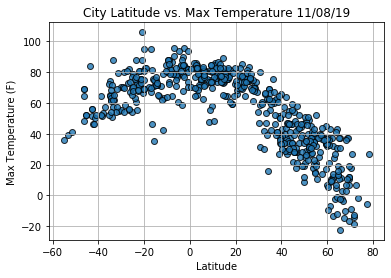

In [97]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Adding other graph properties 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

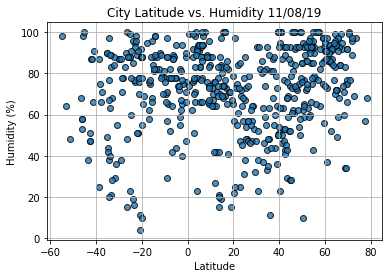

In [98]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

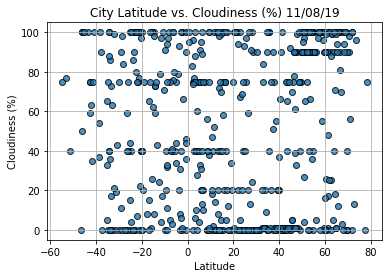

In [99]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

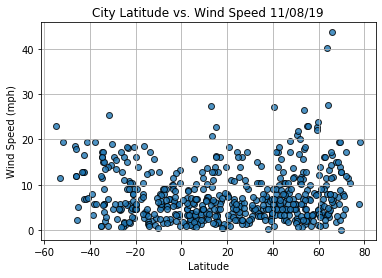

In [100]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [101]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):   # to run the code we need csll function with five parameter 
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    #equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [102]:
index13 = city_data_df.loc[13]
index13

City                Bambanglipuro
Country                        ID
Date          2019-11-09 02:16:38
Lat                         -7.95
Lng                        110.28
Max Temp                    86.43
Humidity                       52
Cloudiness                      5
Wind Speed                   9.06
Name: 13, dtype: object

In [103]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mount Gambier,AU,2019-11-09 02:16:35,-37.83,140.78,53.60,66,90,19.46
1,Uttarkashi,IN,2019-11-09 02:16:35,30.73,78.44,58.39,38,0,4.83
2,Iqaluit,CA,2019-11-09 02:16:36,63.75,-68.52,5.00,77,40,8.05
3,Hithadhoo,MV,2019-11-09 02:16:36,-0.60,73.08,81.82,76,46,10.38
4,Bluff,AU,2019-11-09 02:12:21,-23.58,149.07,87.78,16,0,18.14


In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

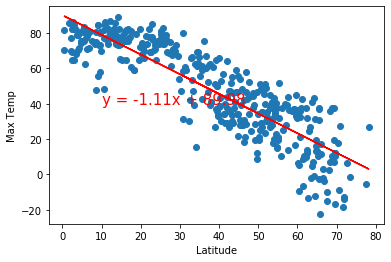

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

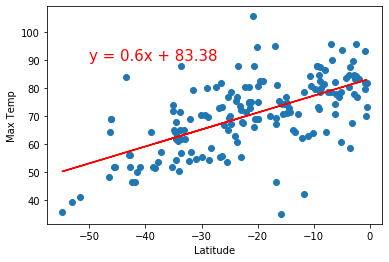

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

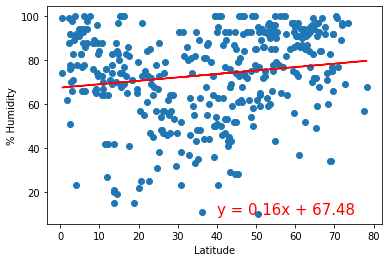

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for % Humidity', '% Humidity',(40,10))

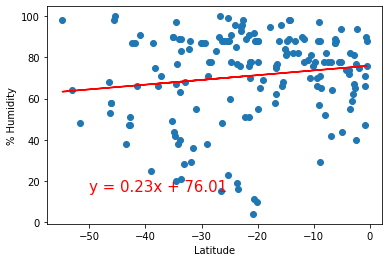

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

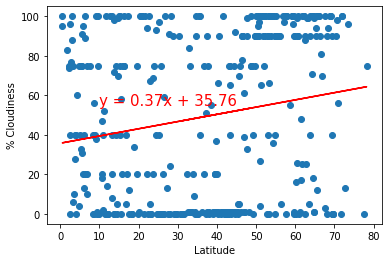

In [109]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values =northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemispher \n for % Cloudiness', '% Cloudiness',(10,55))

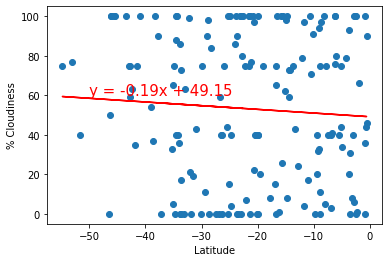

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

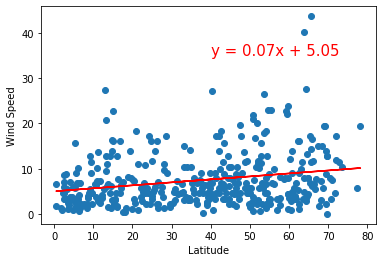

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

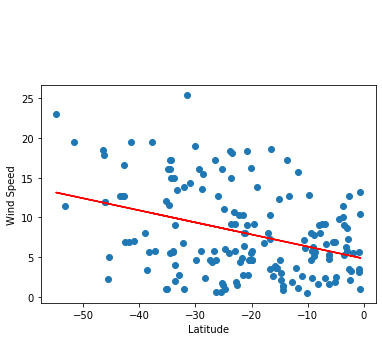

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))